Text(0.5, 1.0, 'Slash Density')

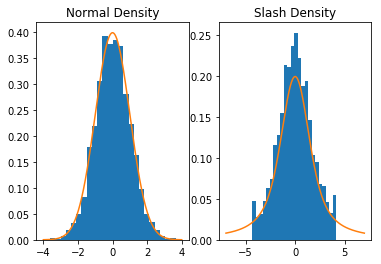

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 21 11:33:24 2020

@author: claytonfields
"""

import numpy as np
from scipy.stats import norm,uniform, poisson,lognorm
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns

def slash(x):
    if x==0:
        return 1/(np.sqrt(2*np.pi))
    else:
        return (1-np.exp(-x**2/2))/(x**2*np.sqrt(2*np.pi))
    

y = norm.rvs(size=100000)/uniform.rvs(size=100000)

denom = []
for y_i in y:
    denom.append(norm.pdf(y_i)/slash(y_i))
denom = np.sum(denom)

def w(x,denom):
    return (norm.pdf(x)/slash(x))/denom
wvals = []
for y_i in y:
    wvals.append(np.asscalar(w(y_i,denom)))

xvals = np.random.choice(y,size=5000,replace=True,p=wvals)
fig = plt.figure()
axes1 = fig.add_subplot(1,2,1)
axes1.hist(xvals,density=True,bins=24,label='data')
domain = np.linspace(-4,4,5000)
axes1.plot(domain,norm.pdf(domain),label='true pdf')
# plt.legend()
axes1.set_title('Normal Density')
"""
use normal as g for targe slash
"""

yslash = norm.rvs(size=100000)
denom = []
for y_i in yslash:
    denom.append(slash(y_i)/norm.pdf(y_i))
denom = np.sum(denom)

def w2(x,denom):
    return (slash(x)/norm.pdf(x))/denom

wvals2 = []
for y_i in yslash:
    wvals2.append(np.asscalar(w2(y_i,denom)))

xvals2 = np.random.choice(yslash,size=5000,replace=True,p=wvals2)

axes2 = fig.add_subplot(1,2,2)
axes2.hist(xvals2,density=True,bins=24,label='data')
domain = np.linspace(-7,7,5000)
foo = []
for xx in domain:
    foo.append(slash(xx))  
axes2.plot(domain,foo,label='true pdf')
# plt.legend()
axes2.set_title('Slash Density')

The estimated mean of the posterior dist. is:  4.27176045949165
The estimated sd of the posterior dist. is:  0.6227213688500406


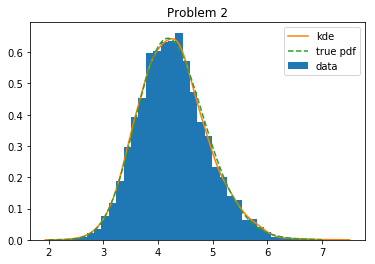

In [2]:
"""
Problem 2
"""

x = np.array([8,3,4,3,1,7,2,6,2,7])

def f(_lambda):
    return lognorm.pdf(_lambda,s=.5,scale=4)

def L(_lambda,x):
    l = []
    for x_i in x:
        l.append(poisson.pmf(x_i,_lambda))
    return np.prod(l)

lvals = lognorm.rvs(s=.5,scale=4,size=100000)
denom = []
for l_i in lvals:
    denom.append(L(l_i,x))
denom = np.sum(denom)

def w3(_lambda,denom):
    return (L(_lambda,x))/denom

wvals3 = []
for l_i in lvals:
    wvals3.append(w3(l_i,denom))

    
xvals3 = np.random.choice(lvals,size=5000,replace=True,p=wvals3)
plt.figure()
plt.hist(xvals3,density=True, bins = 36,label="data")
sns.distplot(xvals3,hist=False, kde=True, label="kde")
domain = np.linspace(2,7,500)


l = []
for i in range(domain.size):
    l.append(L(domain[i],x)*f(domain[i]))
scale =  integrate.simps(l,domain)
l = (1/scale)*np.array(l)
plt.plot(domain,l,"--",label="true pdf")
plt.legend()
plt.title("Problem 2")

print("The estimated mean of the posterior dist. is: ", xvals3.mean())
print("The estimated sd of the posterior dist. is: ", xvals3.std())
